In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-10-global-apps-play-store-reviews/Top10_global_apps_by_downloads_playstore_reviews.csv


In [18]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from gensim.models import Word2Vec
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report
from scipy.sparse import hstack

# Loading the Dataset

In [19]:
df=pd.read_csv('/kaggle/input/top-10-global-apps-play-store-reviews/Top10_global_apps_by_downloads_playstore_reviews.csv')
df

,reviewId,content,score,app,category
0,7ef2741f-fd7a-4eef-8ea8-5e3bc2806e9a,"Super, 😉",5,WhatsApp Messenger,communication
1,bdbb60b4-7290-4f54-8506-899e92ae1fa5,Good,1,WhatsApp Messenger,communication
2,b1965a5d-093d-4787-974a-7b9128fa10c3,Helpful,4,WhatsApp Messenger,communication
3,f6087b82-2e03-49ea-8dda-8854992565b5,Best forever,3,WhatsApp Messenger,communication
4,2eb65092-f7fb-4ef4-b18a-53941caf13b0,Good,5,WhatsApp Messenger,communication
...,...,...,...,...,...
49995,4e43fc09-8e3b-474f-b44a-00f48d19496d,Awesome app!,5,Spotify,Music and Audio
49996,f2ea040a-73a8-4638-a3c0-020017f4e651,Good,3,Spotify,Music and Audio
49997,34780171-bac2-4550-9b3f-2a62547248ed,Not working,1,Spotify,Music and Audio
49998,c6cef81a-786a-4c34-be61-bd69988d075a,"It's the best. If you're considering it, pull ...",5,Spotify,Music and Audio


# EDA

In [20]:
df.isnull().sum()

reviewId     0
content     11
score        0
app          0
category     0
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
df

,reviewId,content,score,app,category
0,7ef2741f-fd7a-4eef-8ea8-5e3bc2806e9a,"Super, 😉",5,WhatsApp Messenger,communication
1,bdbb60b4-7290-4f54-8506-899e92ae1fa5,Good,1,WhatsApp Messenger,communication
2,b1965a5d-093d-4787-974a-7b9128fa10c3,Helpful,4,WhatsApp Messenger,communication
3,f6087b82-2e03-49ea-8dda-8854992565b5,Best forever,3,WhatsApp Messenger,communication
4,2eb65092-f7fb-4ef4-b18a-53941caf13b0,Good,5,WhatsApp Messenger,communication
...,...,...,...,...,...
49995,4e43fc09-8e3b-474f-b44a-00f48d19496d,Awesome app!,5,Spotify,Music and Audio
49996,f2ea040a-73a8-4638-a3c0-020017f4e651,Good,3,Spotify,Music and Audio
49997,34780171-bac2-4550-9b3f-2a62547248ed,Not working,1,Spotify,Music and Audio
49998,c6cef81a-786a-4c34-be61-bd69988d075a,"It's the best. If you're considering it, pull ...",5,Spotify,Music and Audio


In [23]:
df.dtypes


reviewId    object
content     object
score        int64
app         object
category    object
dtype: object

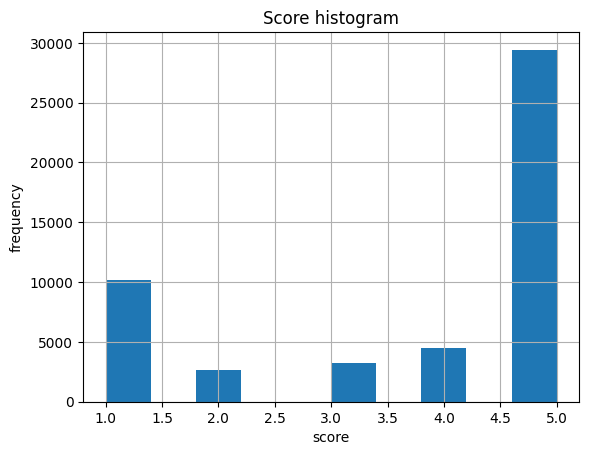

In [24]:
plt.figure()
df['score'].hist()
plt.title('Score histogram')
plt.xlabel('score')
plt.ylabel('frequency')
plt.show()

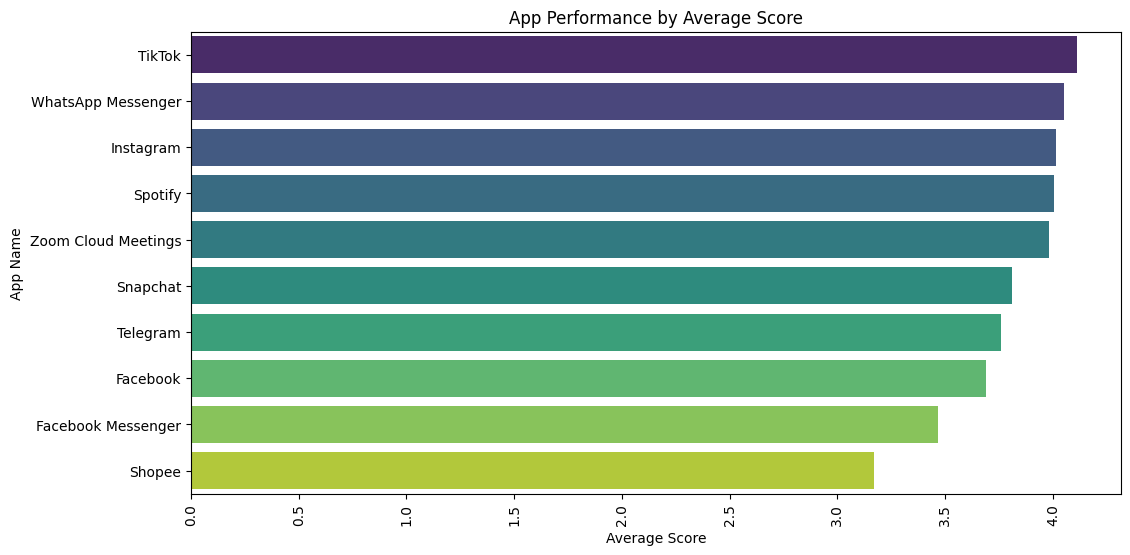

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual dataset file)
# df = pd.read_csv('your_dataset.csv')

# Calculate the average score for each app
app_avg_scores = df.groupby('app')['score'].mean().reset_index()

# Sort apps by average score in descending order
app_avg_scores = app_avg_scores.sort_values(by='score', ascending=False)

# Create a bar plot to visualize app performance
plt.figure(figsize=(12, 6))
sns.barplot(data=app_avg_scores, x='score', y='app', palette='viridis')
plt.title('App Performance by Average Score')
plt.xlabel('Average Score')
plt.ylabel('App Name')
plt.xticks(rotation=90)
plt.show()

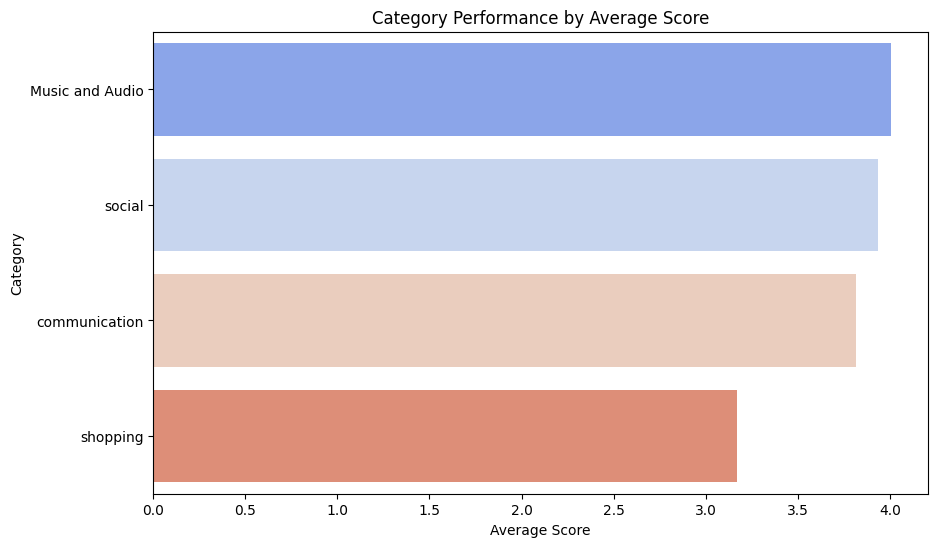

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual dataset file)
# df = pd.read_csv('your_dataset.csv')

# Calculate the average score for each app category
category_avg_scores = df.groupby('category')['score'].mean().reset_index()

# Sort categories by average score in descending order
category_avg_scores = category_avg_scores.sort_values(by='score', ascending=False)

# Create a bar plot to visualize category performance
plt.figure(figsize=(10, 6))
sns.barplot(data=category_avg_scores, x='score', y='category', palette='coolwarm')
plt.title('Category Performance by Average Score')
plt.xlabel('Average Score')
plt.ylabel('Category')
plt.show()

In [27]:
import pandas as pd

# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual dataset file)
# df = pd.read_csv('your_dataset.csv')

# Calculate basic descriptive statistics for the 'score' column
descriptive_stats = df['score'].describe()

# Print the results
print(descriptive_stats)

count    49989.000000
mean         3.806617
std          1.630898
min          1.000000
25%          2.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: score, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


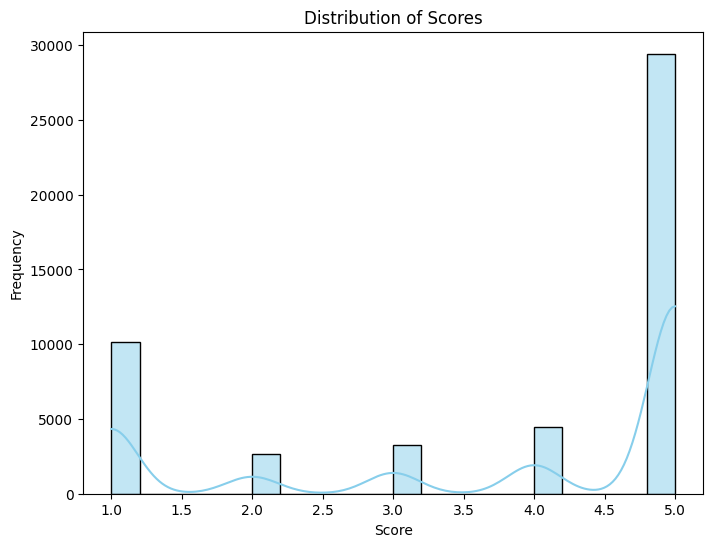

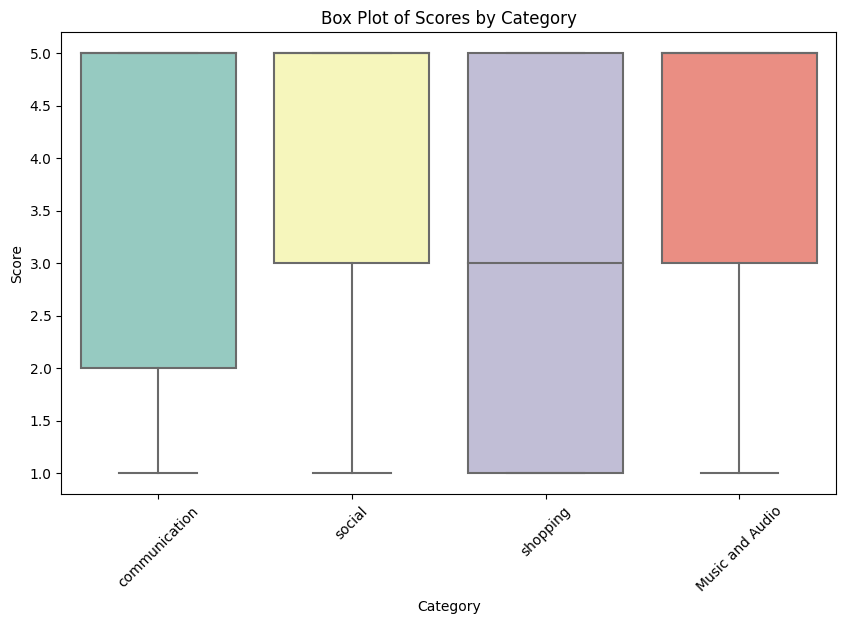

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


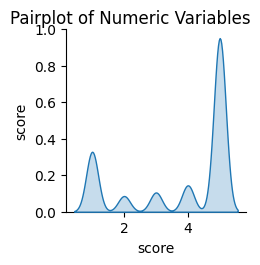

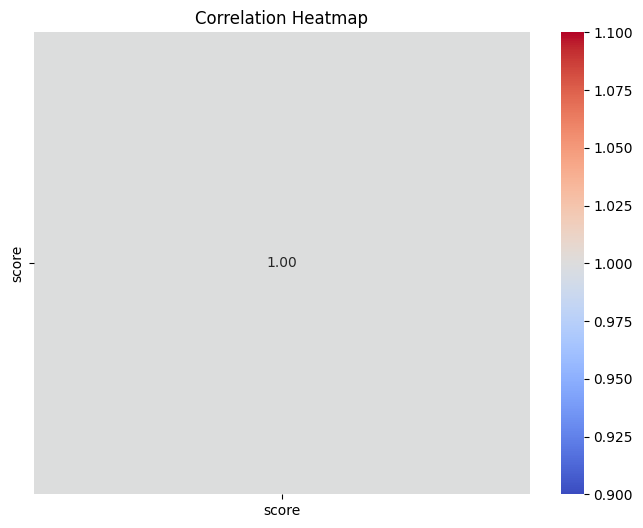

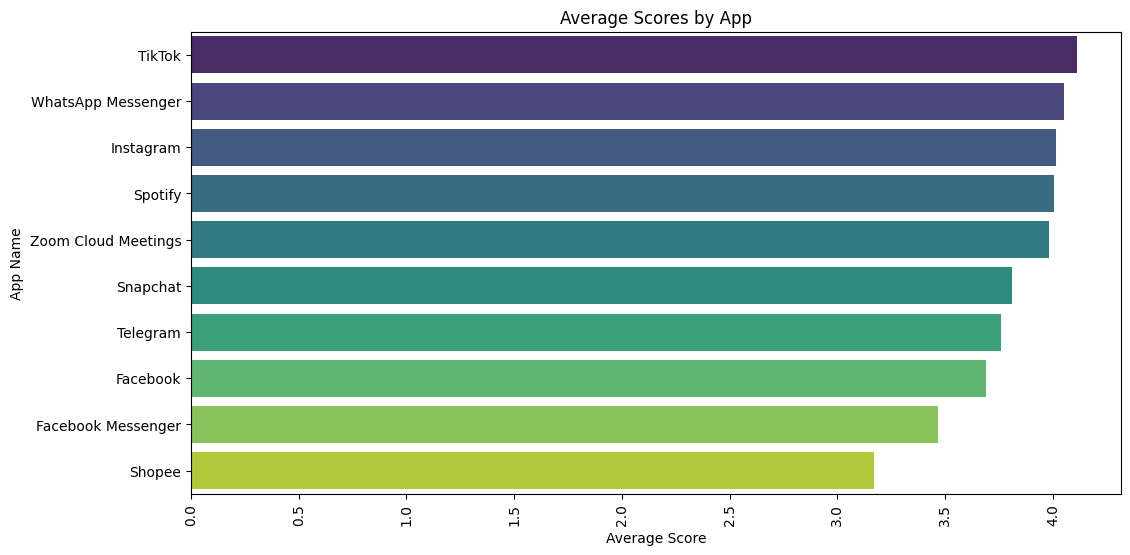

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset into a DataFrame
# df = pd.read_csv('your_dataset.csv')

# Visualization 1: Histogram of Scores
plt.figure(figsize=(8, 6))
sns.histplot(df['score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Box Plot of Scores by Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='score', palette='Set3')
plt.title('Box Plot of Scores by Category')
plt.xlabel('Category')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

# Visualization 3: Pairplot of Numeric Variables
numeric_columns = df.select_dtypes(include=['int64']).columns
sns.pairplot(data=df[numeric_columns], diag_kind='kde')
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

# Visualization 4: Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Visualization 5: Bar Plot of Average Scores by App
app_avg_scores = df.groupby('app')['score'].mean().reset_index()
app_avg_scores = app_avg_scores.sort_values(by='score', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=app_avg_scores, x='score', y='app', palette='viridis')
plt.title('Average Scores by App')
plt.xlabel('Average Score')
plt.ylabel('App Name')
plt.xticks(rotation=90)
plt.show()

# Sentiment Analysis (using TExtBlob)

Sentiment Distribution:
sentiment
Positive    26687
Neutral     19096
Negative     4206
Name: count, dtype: int64


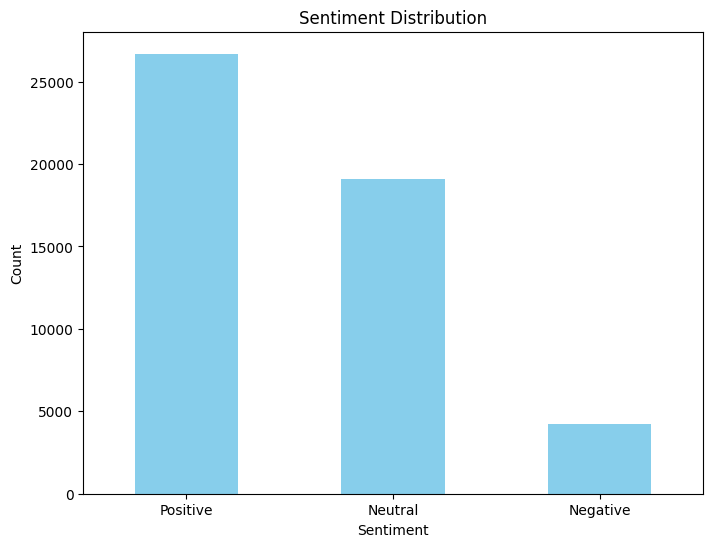

In [29]:
import pandas as pd
from textblob import TextBlob

# Load your dataset into a DataFrame
# df = pd.read_csv('your_dataset.csv')

# Function to perform sentiment analysis on a text
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis to the 'content' column and create a new column 'sentiment'
df['sentiment'] = df['content'].apply(analyze_sentiment)

# Count the number of reviews in each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Print sentiment distribution
print("Sentiment Distribution:")
print(sentiment_counts)

# Visualize sentiment distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [30]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


# Sentiment Analysis (Using Vader)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Sentiment Distribution (VADER):
sentiment_vader
Positive    27250
Neutral     17057
Negative     5682
Name: count, dtype: int64


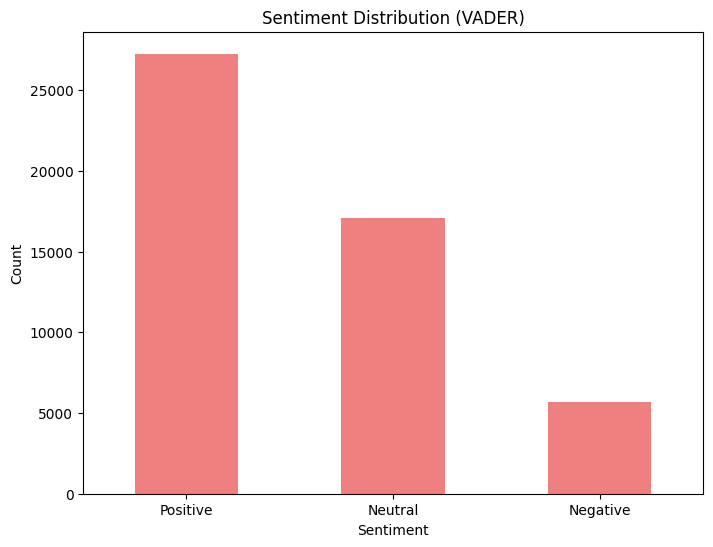

In [31]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon (you only need to do this once)
nltk.download('vader_lexicon')

# Load your dataset into a DataFrame
# df = pd.read_csv('your_dataset.csv')

# Create a VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis on a text using VADER
def analyze_sentiment_vader(text):
    sentiment_scores = sia.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'content' column and create a new column 'sentiment_vader'
df['sentiment_vader'] = df['content'].apply(analyze_sentiment_vader)

# Count the number of reviews in each sentiment category
sentiment_counts_vader = df['sentiment_vader'].value_counts()

# Print sentiment distribution
print("Sentiment Distribution (VADER):")
print(sentiment_counts_vader)

# Visualize sentiment distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sentiment_counts_vader.plot(kind='bar', color='lightcoral')
plt.title('Sentiment Distribution (VADER)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Preprocessing

In [32]:
import pandas as pd
import spacy
import re

# Load Spacy English model
nlp = spacy.load('en_core_web_sm')


# Function to clean text
def clean_text(text):
    # Remove unwanted characters
    text = re.sub(r'\W', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    # Substitute multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    return text

# Function to preprocess text using Spacy
def preprocess_text(text):
    # Clean the text
    text = clean_text(text)
    # Process the text with Spacy
    doc = nlp(text)
    # Tokenize, remove stop words and punctuations, and lemmatize
    words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(words)

# Apply preprocessing to the text columns
df['cleaned_content'] = df['content'].apply(preprocess_text)

# Display the first few rows of the preprocessed dataframe
df


,reviewId,content,score,app,category,sentiment,sentiment_vader,cleaned_content
0,7ef2741f-fd7a-4eef-8ea8-5e3bc2806e9a,"Super, 😉",5,WhatsApp Messenger,communication,Positive,Positive,super
1,bdbb60b4-7290-4f54-8506-899e92ae1fa5,Good,1,WhatsApp Messenger,communication,Positive,Positive,good
2,b1965a5d-093d-4787-974a-7b9128fa10c3,Helpful,4,WhatsApp Messenger,communication,Neutral,Positive,helpful
3,f6087b82-2e03-49ea-8dda-8854992565b5,Best forever,3,WhatsApp Messenger,communication,Positive,Positive,well forever
4,2eb65092-f7fb-4ef4-b18a-53941caf13b0,Good,5,WhatsApp Messenger,communication,Positive,Positive,good
...,...,...,...,...,...,...,...,...
49995,4e43fc09-8e3b-474f-b44a-00f48d19496d,Awesome app!,5,Spotify,Music and Audio,Positive,Positive,awesome app
49996,f2ea040a-73a8-4638-a3c0-020017f4e651,Good,3,Spotify,Music and Audio,Positive,Positive,good
49997,34780171-bac2-4550-9b3f-2a62547248ed,Not working,1,Spotify,Music and Audio,Neutral,Neutral,work
49998,c6cef81a-786a-4c34-be61-bd69988d075a,"It's the best. If you're considering it, pull ...",5,Spotify,Music and Audio,Positive,Positive,good consider pull trigger happy


In [34]:
rat=np.where((df.score>3.0),1,0)
rat

array([1, 0, 1, ..., 0, 1, 1])

In [35]:
X=df['cleaned_content']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, rat, test_size=0.2, random_state=42)


# TFIDF

In [37]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features as needed

# Fit and transform on the training data for TF-IDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data for TF-IDF
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# ML implementation (TFIDF)

In [38]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier  # Import Gradient Boosting Classifier

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    
}

# Train and evaluate classifiers
for name, classifier in classifiers.items():
    classifier_pipeline = make_pipeline(classifier)
    
    if name == 'Gaussian Naive Bayes':
        # Convert sparse matrices to dense arrays
        X_train_dense = X_train_tfidf.toarray()
        X_test_dense = X_test_tfidf.toarray()
        classifier_pipeline.fit(X_train_dense, y_train)  # No label encoding here
        y_pred = classifier_pipeline.predict(X_test_dense)
    else:
        classifier_pipeline.fit(X_train_tfidf, y_train)  # No label encoding here
        y_pred = classifier_pipeline.predict(X_test_tfidf)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print()

    classification_rep = classification_report(y_test, y_pred)  # No target_names parameter
    print("Classification Report:")
    print(classification_rep)
    print("="*50)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: Logistic Regression
Accuracy: 0.83
Precision: 0.84
Recall: 0.93
F1-Score: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.60      0.68      3112
           1       0.84      0.93      0.88      6886

    accuracy                           0.83      9998
   macro avg       0.81      0.76      0.78      9998
weighted avg       0.82      0.83      0.82      9998

Classifier: Decision Tree
Accuracy: 0.79
Precision: 0.82
Recall: 0.89
F1-Score: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.57      0.63      3112
           1       0.82      0.89      0.86      6886

    accuracy                           0.79      9998
   macro avg       0.76      0.73      0.74      9998
weighted avg       0.79      0.79      0.79      9998

Classifier: Random Forest
Accuracy: 0.82
Precision: 0.84
Recall: 0.90
F1-Score: 0.87

Classification Report:
             

# Bag of Words

In [39]:
# Create BoW vectorizer
bow_vectorizer = CountVectorizer(max_features=5000)  # You can adjust the number of features as needed
# Fit and transform on the training data for BoW
X_train_bow = bow_vectorizer.fit_transform(X_train)

# Transform the testing data for BoW
X_test_bow = bow_vectorizer.transform(X_test)

# ML implementation (Bag of Words)

In [40]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier  # Import Gradient Boosting Classifier

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    
}

# Train and evaluate classifiers
for name, classifier in classifiers.items():
    classifier_pipeline = make_pipeline(classifier)
    
    if name == 'Gaussian Naive Bayes':
        # Convert sparse matrices to dense arrays
        X_train_dense = X_train_bow.toarray()
        X_test_dense = X_test_bow.toarray()
        classifier_pipeline.fit(X_train_dense, y_train)  # No label encoding here
        y_pred = classifier_pipeline.predict(X_test_dense)
    else:
        # Use X_test_bow for testing in the else branch
        classifier_pipeline.fit(X_train_bow, y_train)  # No label encoding here
        y_pred = classifier_pipeline.predict(X_test_bow)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print()

    classification_rep = classification_report(y_test, y_pred)  # No target_names parameter
    print("Classification Report:")
    print(classification_rep)
    print("="*50)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: Logistic Regression
Accuracy: 0.83
Precision: 0.83
Recall: 0.94
F1-Score: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.56      0.67      3112
           1       0.83      0.94      0.88      6886

    accuracy                           0.83      9998
   macro avg       0.82      0.75      0.77      9998
weighted avg       0.82      0.83      0.82      9998

Classifier: Decision Tree
Accuracy: 0.79
Precision: 0.81
Recall: 0.89
F1-Score: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.55      0.61      3112
           1       0.81      0.89      0.85      6886

    accuracy                           0.79      9998
   macro avg       0.75      0.72      0.73      9998
weighted avg       0.78      0.79      0.78      9998

Classifier: Random Forest
Accuracy: 0.81
Precision: 0.84
Recall: 0.91
F1-Score: 0.87

Classification Report:
             

# TFIDF+Bag of Words

In [41]:
# Combine TF-IDF and BoW representations for training data
X_train_combined = hstack([X_train_tfidf, X_train_bow])

# Combine TF-IDF and BoW representations for testing data
X_test_combined = hstack([X_test_tfidf, X_test_bow])

# ML Implementation (TFIDF+Bag of Words)

In [42]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier  # Import Gradient Boosting Classifier

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    
}

# Train and evaluate classifiers
for name, classifier in classifiers.items():
    classifier_pipeline = make_pipeline(classifier)
    
    if name == 'Gaussian Naive Bayes':
        # Convert sparse matrices to dense arrays
        X_train_dense = X_train_combined.toarray()
        X_test_dense = X_test_combined.toarray()
        classifier_pipeline.fit(X_train_dense, y_train)  # No label encoding here
        y_pred = classifier_pipeline.predict(X_test_dense)
    else:
        classifier_pipeline.fit(X_train_combined, y_train)  # No label encoding here
        y_pred = classifier_pipeline.predict(X_test_combined)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print()

    classification_rep = classification_report(y_test, y_pred)  # No target_names parameter
    print("Classification Report:")
    print(classification_rep)
    print("="*50)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: Logistic Regression
Accuracy: 0.83
Precision: 0.83
Recall: 0.93
F1-Score: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.59      0.68      3112
           1       0.83      0.93      0.88      6886

    accuracy                           0.83      9998
   macro avg       0.82      0.76      0.78      9998
weighted avg       0.82      0.83      0.82      9998

Classifier: Decision Tree
Accuracy: 0.79
Precision: 0.82
Recall: 0.89
F1-Score: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.57      0.63      3112
           1       0.82      0.89      0.85      6886

    accuracy                           0.79      9998
   macro avg       0.76      0.73      0.74      9998
weighted avg       0.78      0.79      0.78      9998

Classifier: Random Forest
Accuracy: 0.82
Precision: 0.84
Recall: 0.90
F1-Score: 0.87

Classification Report:
             